In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr, pearsonr
sns.set_theme(style="whitegrid")

In [2]:
try:
    df = pd.read_csv('student-mat.csv', sep=';')
    print(f"Dados carregados com sucesso: {len(df)} registros de estudantes.")
except FileNotFoundError:
    print("Erro: O arquivo 'student-mat.csv' não foi encontrado!")
    exit()

# Estatísticas descritivas para a nota final G3
print("\n" + "="*60)
print("ESTATÍSTICAS DESCRITIVAS DA NOTA FINAL (G3)")
print("="*60)
print(f"Média da nota G3: {df['G3'].mean():.2f}")
print(f"Desvio padrão da nota G3: {df['G3'].std():.2f}")
print(f"Nota mínima em G3: {df['G3'].min():.2f}")
print(f"Nota máxima em G3: {df['G3'].max():.2f}")

# Categorização auxiliar (para análise descritiva apenas)
nota_limite = 14  # 70% de 20
df['acima_70_porcento_g3'] = np.where(df['G3'] >= nota_limite, 'Sim', 'Não')

Dados carregados com sucesso: 395 registros de estudantes.

ESTATÍSTICAS DESCRITIVAS DA NOTA FINAL (G3)
Média da nota G3: 10.42
Desvio padrão da nota G3: 4.58
Nota mínima em G3: 0.00
Nota máxima em G3: 20.00


In [3]:
# Criar colunas binárias indicando presença de fatores de risco
df['risco_failures'] = df['failures'].apply(lambda x: 1 if x > 0 else 0)
df['risco_studytime'] = df['studytime'].apply(lambda x: 1 if x == 1 else 0)
df['risco_higher'] = df['higher'].map({'no': 1, 'yes': 0})
df['risco_paid'] = df['paid'].map({'no': 1, 'yes': 0})

# Somar total de fatores de risco por aluno
df['total_riscos'] = (
    df['risco_failures'] +
    df['risco_studytime'] +
    df['risco_higher'] +
    df['risco_paid']
)

# Agrupar por número de riscos e calcular média da nota G3
grupo_risco = df.groupby('total_riscos')['G3'].agg(['count', 'mean']).rename(columns={
    'count': 'Qtd_Alunos',
    'mean': 'Media_G3'
}).reset_index()

print("\nAnálise de G3 por número de fatores de risco:")
print(grupo_risco)



Análise de G3 por número de fatores de risco:
   total_riscos  Qtd_Alunos   Media_G3
0             0         131  11.099237
1             1         148  11.195946
2             2          83   9.506024
3             3          24   6.666667
4             4           9   6.000000


In [4]:
# Criar colunas binárias indicando presença de fatores de risco
df['risco_failures'] = df['failures'].apply(lambda x: 1 if x > 0 else 0)
df['risco_studytime'] = df['studytime'].apply(lambda x: 1 if x == 1 else 0)
df['risco_higher'] = df['higher'].map({'no': 1, 'yes': 0})
df['risco_paid'] = df['paid'].map({'no': 1, 'yes': 0})

# Somar total de fatores de risco por aluno
df['total_riscos'] = (
    df['risco_failures'] +
    df['risco_studytime'] +
    df['risco_higher'] +
    df['risco_paid']
)

# Agrupar por número de riscos e calcular média da nota G3
grupo_risco = df.groupby('total_riscos')['G3'].agg(['count', 'mean']).rename(columns={
    'count': 'Qtd_Alunos',
    'mean': 'Media_G3'
}).reset_index()

print("\nAnálise de G3 por número de fatores de risco:")
print(grupo_risco)



Análise de G3 por número de fatores de risco:
   total_riscos  Qtd_Alunos   Media_G3
0             0         131  11.099237
1             1         148  11.195946
2             2          83   9.506024
3             3          24   6.666667
4             4           9   6.000000


C:\Users\diego\AppData\Local\Temp\ipykernel_11220\2286376067.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grupo_risco, x='total_riscos', y='Media_G3', palette='Reds')


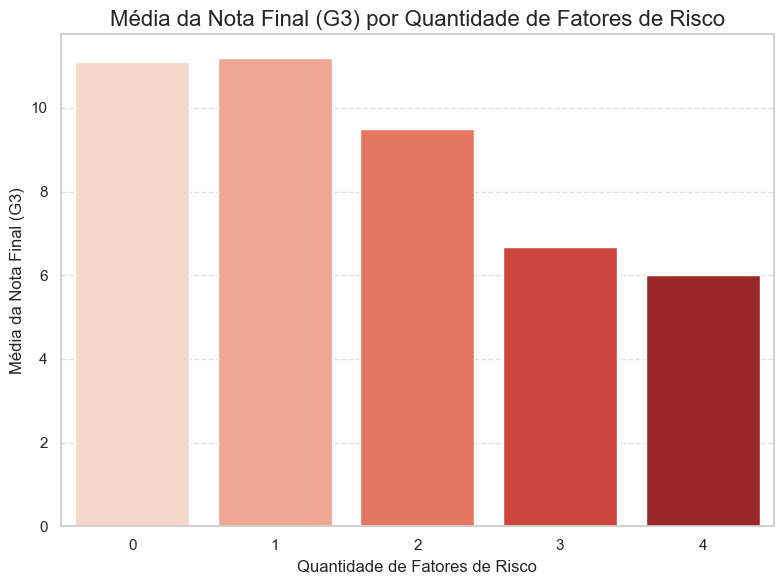

In [5]:
plt.figure(figsize=(8, 6))
sns.barplot(data=grupo_risco, x='total_riscos', y='Media_G3', palette='Reds')

plt.title('Média da Nota Final (G3) por Quantidade de Fatores de Risco', fontsize=16)
plt.xlabel('Quantidade de Fatores de Risco', fontsize=12)
plt.ylabel('Média da Nota Final (G3)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
